In [181]:
#Importing Libraries

#for pulling and formating data
import requests
import pandas as pd
import json

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.ticker import PercentFormatter

#For textual analysis
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
from textblob import TextBlob



# Understand data and pull out product options

In [207]:
#Pull small sample
headers = {
    'accept': 'application/json',
}

params = (
    ('company_received_min', '2016-01-01'),
    ('company_received_max', '2016-12-31'),
    ('format', 'json'),
    ('state', 'NY'),
)

response = requests.get('https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/', headers=headers, params=params)


#Checking that request worked
print("Checking that data was pulled correctly.", '\n')
response.raise_for_status()
print('Pulling info', '\n', '\n')

#formating response as json
sample_data = response.json()
#De-nesting data
sample_data = pd.json_normalize(sample_data)

#List variable names in dataset
print('\033[1m'+'Variable Names'+'\033[0m', *list(sample_data.columns),sep='\n')
print('\n')

#Find products in databases
print('\033[1m'+ 'Products' + '\033[0m', *sample_data["_source.product"].unique(), sep='\n')



Checking that data was pulled correctly. If there is an error, check parameters for typos! 

Pulling info 
 

Variable Names
_index
_type
_id
_score
sort
_source.product
_source.complaint_what_happened
_source.date_sent_to_company
_source.issue
_source.sub_product
_source.zip_code
_source.tags
_source.complaint_id
_source.timely
_source.consumer_consent_provided
_source.company_response
_source.submitted_via
_source.company
_source.date_received
_source.state
_source.consumer_disputed
_source.company_public_response
_source.sub_issue


Products
Credit reporting
Bank account or service
Student loan
Mortgage
Debt collection
Credit card
Payday loan
Money transfers
Consumer Loan
Prepaid card
Other financial service


# Pull subset of data to analyze base on parameters

In [210]:
#Adjust parameters to pull another subset focused on a specific product 
headers = {
    'accept': 'application/json',
}

params = (
    ('company_received_min', '2012-01-01'),
    ('company_received_max', '2020-01-01'),
    ('product', 'Payday loan'),
    ('state','CA'),
    ('format', 'json')
)

response = requests.get('https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/', 
                        headers=headers, params=params)


#Checking that request worked
print("Checking that data was pulled correctly.", '\n')
response.raise_for_status()
print('Pulling info...', '\n', '\n')

#formating response as json
data = response.json()
#De-nesting data
data = pd.json_normalize(data)
#show formatted data as pandas dataframes
print('Done!')
print('\033[1m'+ 'Data preview' + '\033[0m')
data

Checking that data was pulled correctly. 

Pulling info... 
 

Done!
Data preview


,_index,_type,_id,_score,sort,_source.product,_source.complaint_what_happened,_source.date_sent_to_company,_source.issue,_source.sub_product,...,_source.timely,_source.consumer_consent_provided,_source.company_response,_source.submitted_via,_source.company,_source.date_received,_source.state,_source.consumer_disputed,_source.company_public_response,_source.sub_issue
0,complaint-public-v1,_doc,2201991,None,[2950],Payday loan,,2016-11-14T12:00:00-05:00,Can't contact lender,None,...,No,Consent not provided,Closed with explanation,Web,Midwest Recovery Systems,2016-11-10T12:00:00-05:00,CA,No,None,None
1,complaint-public-v1,_doc,2031860,None,[4072],Payday loan,,2016-07-29T12:00:00-05:00,Received a loan I didn't apply for,None,...,No,Consent not provided,Closed with explanation,Web,Midwest Recovery Systems,2016-07-26T12:00:00-05:00,CA,No,None,None
2,complaint-public-v1,_doc,2234380,None,[17271],Payday loan,On XXXX of XXXX I took out a payday loan with ...,2016-12-03T12:00:00-05:00,Can't stop charges to bank account,None,...,Yes,Consent provided,Closed with explanation,Web,CURO Intermediate Holdings,2016-12-03T12:00:00-05:00,CA,Yes,None,None
3,complaint-public-v1,_doc,2232231,None,[41563],Payday loan,,2016-12-01T12:00:00-05:00,Charged fees or interest I didn't expect,None,...,No,Consent not provided,Untimely response,Web,"Mobiloans, LLC",2016-12-01T12:00:00-05:00,CA,No,None,None
4,complaint-public-v1,_doc,2446751,None,[41983],Payday loan,my wife and i took out XXXX catcall loans fo...,2017-05-09T12:00:00-05:00,Charged fees or interest I didn't expect,None,...,Yes,Consent provided,Closed with explanation,Web,"CASHCALL, INC.",2017-04-21T12:00:00-05:00,CA,No,Company believes complaint caused principally ...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,complaint-public-v1,_doc,1365248,None,[465588],Payday loan,I borrowed {$200.00} for XXXX days and I paid ...,2015-05-08T12:00:00-05:00,Charged fees or interest I didn't expect,None,...,Yes,Consent provided,Closed with explanation,Web,LendUp Loans LLC,2015-05-07T12:00:00-05:00,CA,No,None,None
689,complaint-public-v1,_doc,1340415,None,[465872],Payday loan,,2015-04-21T12:00:00-05:00,Charged fees or interest I didn't expect,None,...,Yes,Other,Closed with explanation,Web,"Populus Financial Group, Inc. (F/K/A Ace Cash ...",2015-04-21T12:00:00-05:00,CA,No,None,None
690,complaint-public-v1,_doc,1307850,None,[465896],Payday loan,,2015-03-31T12:00:00-05:00,Charged fees or interest I didn't expect,None,...,Yes,Other,Closed,Web,CURO Intermediate Holdings,2015-03-31T12:00:00-05:00,CA,No,None,None
691,complaint-public-v1,_doc,2116574,None,[465897],Payday loan,,2016-09-19T12:00:00-05:00,Can't stop charges to bank account,None,...,Yes,Other,Closed with explanation,Web,CURO Intermediate Holdings,2016-09-16T12:00:00-05:00,CA,No,None,None


# Explore cross-sectional and time-series variation

Summary Stats by Company
count   114.00
mean      6.08
std      12.96
min       1.00
25%       1.00
50%       1.00
75%       4.00
max      80.00
Name: _source.company, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


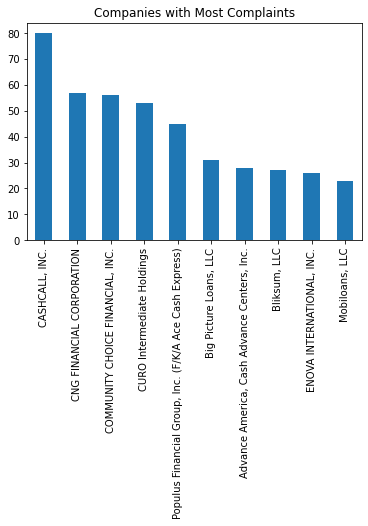

In [216]:
#Summarize frequency of companies
print('\033[1m' + 'Summary Stats by Company' + '\033[0m')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(data["_source.company"].value_counts().describe())

#Graphing top 10 companies 
print(data["_source.company"].value_counts().head(10).plot(kind="bar", title="Companies with Most Complaints"))


Ranked complaints by issues
Charged fees or interest I didn't expect    291
Can't contact lender                        106
Received a loan I didn't apply for           87
Can't stop charges to bank account           74
Payment to acct not credited                 49
Applied for loan/did not receive money       47
Charged bank acct wrong day or amt           39
Name: _source.issue, dtype: int64
AxesSubplot(0.135,0.125;0.755x0.755)


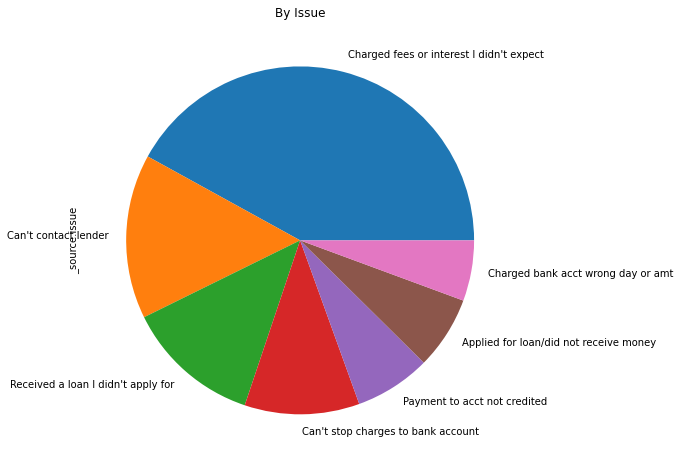

In [214]:
#Summarize types of issues
print('\033[1m' + 'Ranked complaints by issues' +'\033[0m')
print(data["_source.issue"].value_counts())

#Making a pie chart
print(data["_source.issue"].value_counts().plot(kind="pie", title="By Issue", figsize=(8,8)))

AxesSubplot(0.125,0.125;0.775x0.755)


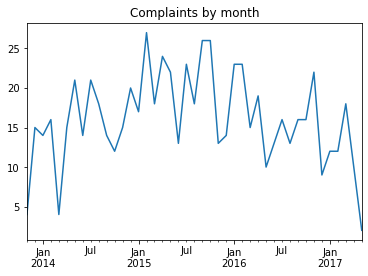

In [218]:
#Summarize time series of complaints

#Ensure date is in date format 
data["_source.date_sent_to_company"] = pd.to_datetime(data["_source.date_sent_to_company"]).dt.date
data['month'] = pd.to_datetime(data['_source.date_sent_to_company']).dt.to_period('M')
frequency = data['month'].value_counts()

#Plotting complaints by date 
print(frequency.sort_index().plot(title="Complaints by month"))

AxesSubplot(0.125,0.125;0.775x0.755)


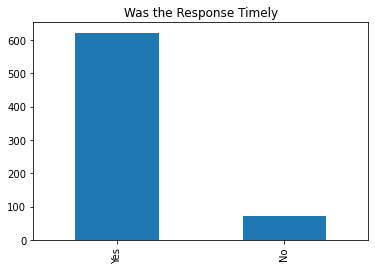

In [219]:
#Checking if response was timely 
print(data["_source.timely"].value_counts().plot(kind="bar", title="Was the Response Timely"))

# Looking at the Text of the Complaints

In [244]:
# Use English stemmer.
stemmer = SnowballStemmer("english")

#Removing Stopwords
extra_stops=["xxxx","xxxxxxxx","would"]
stoplist = stopwords.words('english') + extra_stops

narrative = data['_source.complaint_what_happened']

#Lowercase
narrative = narrative.apply(lambda x: " ".join(x.lower() for x in x.split()))
#Remove punct.
narrative = narrative.str.replace('[^\w\s]','',regex=True)
#Remove stopwords
narrative= narrative.apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
#Tokenize words
narrative = narrative.apply(word_tokenize)
#Stemming words
narrative = narrative.apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

#Get frequencies
results=Counter()
narrative.apply(results.update)

print('\033[1m'+ '20 Most Common words' + '\033[0m', *results.most_common(20), sep='\n')


20 Most Common words
('loan', 563)
('call', 320)
('pay', 238)
('payment', 222)
('account', 210)
('compani', 168)
('month', 125)
('money', 125)
('payday', 124)
('credit', 117)
('charg', 116)
('nt', 116)
('interest', 115)
('cash', 113)
('paid', 111)
('said', 109)
('get', 109)
('state', 106)
('told', 106)
('receiv', 106)


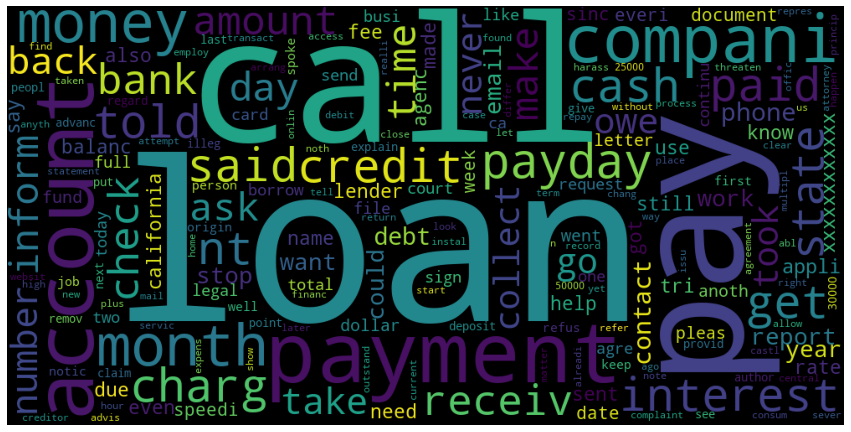

In [227]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(results)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [230]:
narrative_bigrams = narrative.apply(lambda row: list(nltk.ngrams(row, 2)))
results_bigram = Counter()
narrative_bigrams.apply(results_bigram.update)

print('\033[1m'+ '20 Most Common Bigrams' + '\033[0m', *results_bigram.most_common(20), sep='\n')


20 Most Common Bigrams
(('payday', 'loan'), 103)
(('speedi', 'cash'), 40)
(('bank', 'account'), 39)
(('credit', 'report'), 37)
(('interest', 'rate'), 34)
(('make', 'payment'), 32)
(('pay', 'loan'), 25)
(('pay', 'day'), 25)
(('take', 'money'), 24)
(('loan', 'compani'), 23)
(('collect', 'agenc'), 23)
(('compani', 'call'), 22)
(('loan', 'amount'), 22)
(('check', 'account'), 22)
(('pay', 'back'), 22)
(('appli', 'loan'), 21)
(('took', 'loan'), 20)
(('two', 'week'), 20)
(('phone', 'call'), 19)
(('phone', 'number'), 19)


# Sentiment Analysis

In [253]:
# function to calculate polarity
def getPolarity(review):
     return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Polarity'] = data['_source.complaint_what_happened'].apply(getPolarity) 
data['Pos/Neg?'] = data['Polarity'].apply(analysis)

data_with_narrative = data[data['_source.complaint_what_happened'] != '']
data_with_narrative[data_with_narrative["Polarity"]==0]

,_index,_type,_id,_score,sort,_source.product,_source.complaint_what_happened,_source.date_sent_to_company,_source.issue,_source.sub_product,...,_source.date_received,_source.state,_source.consumer_disputed,_source.company_public_response,_source.sub_issue,month,Polarity,Analysis,Pos/Neg?,Narrative
108,complaint-public-v1,_doc,1698701,None,[223499],Payday loan,I rec 'd phone call from this company called X...,2015-12-18,Can't contact lender,None,...,2015-12-15T12:00:00-05:00,CA,No,None,None,2015-12,0.00,Neutral,Neutral,rec phone call company called phone regarding ...
169,complaint-public-v1,_doc,1554447,None,[268070],Payday loan,speedy cash charged me {$310.00} for a loan of...,2015-09-07,Charged fees or interest I didn't expect,None,...,2015-09-07T12:00:00-05:00,CA,No,None,None,2015-09,0.00,Neutral,Neutral,speedy cash charged 31000 loan 24000 reported ...
282,complaint-public-v1,_doc,2162788,None,[335173],Payday loan,Bank of America made me a loan XXXX 2016 with ...,2016-10-19,Charged fees or interest I didn't expect,None,...,2016-10-16T12:00:00-05:00,CA,No,Company has responded to the consumer and the ...,None,2016-10,0.00,Neutral,Neutral,bank america made loan 2016 0 interest 18 mont...
293,complaint-public-v1,_doc,1985950,None,[337222],Payday loan,Someone claims I owe {$790.00} for a payday lo...,2016-06-29,Received a loan I didn't apply for,None,...,2016-06-27T12:00:00-05:00,CA,No,None,None,2016-06,0.00,Neutral,Neutral,someone claims owe 79000 payday loan thru take...
294,complaint-public-v1,_doc,1593034,None,[337295],Payday loan,My mother is a SSI XXXX recipient. Payday loan...,2015-10-07,Can't contact lender,None,...,2015-10-05T12:00:00-05:00,CA,No,None,None,2015-10,0.00,Neutral,Neutral,mother ssi recipient payday loans extended peo...
295,complaint-public-v1,_doc,1617594,None,[337421],Payday loan,I have had a debt consolidation company issue ...,2015-10-23,Charged fees or interest I didn't expect,None,...,2015-10-21T12:00:00-05:00,CA,No,None,None,2015-10,0.00,Neutral,Neutral,debt consolidation company issue cease desist ...
300,complaint-public-v1,_doc,2166242,None,[338171],Payday loan,I was contacted via telephone by a company cla...,2016-10-21,Charged fees or interest I didn't expect,None,...,2016-10-18T12:00:00-05:00,CA,Yes,None,None,2016-10,0.00,Neutral,Neutral,contacted via telephone company claiming took ...
310,complaint-public-v1,_doc,1401818,None,[339271],Payday loan,I ca n't stop Bill collectors for harassing me...,2015-06-03,Applied for loan/did not receive money,None,...,2015-06-02T12:00:00-05:00,CA,No,None,None,2015-06,0.00,Neutral,Neutral,ca nt stop bill collectors harassing making co...
318,complaint-public-v1,_doc,1591716,None,[341010],Payday loan,I took a loan with CASH CENTRAL XXXX XXXX XXXX...,2015-10-03,Charged fees or interest I didn't expect,None,...,2015-10-03T12:00:00-05:00,CA,No,None,None,2015-10,0.00,Neutral,Neutral,took loan cash central ut phone agree 80 inter...
323,complaint-public-v1,_doc,1927041,None,[341912],Payday loan,I went in speedy cash on XX/XX/XXXX2016 to app...,2016-05-16,Applied for loan/did not receive money,None,...,2016-05-16T12:00:00-05:00,CA,No,None,None,2016-05,0.00,Neutral,Neutral,went speedy cash xxxxxxxx2016 apply loan told ...


count   238.00
mean      0.02
std       0.17
min      -0.65
25%      -0.05
50%       0.00
75%       0.09
max       0.70
Name: Polarity, dtype: float64


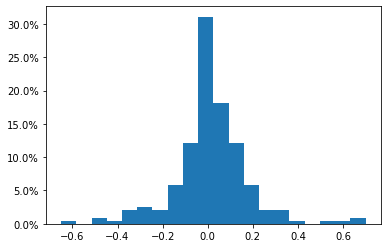

In [254]:
plt.hist(data_with_narrative["Polarity"], 
         weights=np.ones(len(data_with_narrative["Polarity"])) / len(data_with_narrative["Polarity"]),
         bins=20)


plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

print(data_with_narrative["Polarity"].describe())


# Comparing with other datasets

In [262]:
#hotels dataset from https://data.world/datafiniti/hotel-reviews

hotel_reviews = pd.read_csv('hotel_reviews-sub.csv')

#Subset into 2 datasets; one positive, one negative hotel reviews
hotel_reviews_pos = hotel_reviews[hotel_reviews['reviews.rating'] == (4 or 5)]
hotel_reviews_pos["reviews.text"] = hotel_reviews_pos["reviews.text"].apply(lambda x: str(x))
hotel_reviews_neg = hotel_reviews[hotel_reviews['reviews.rating'] == (1 or 2)]
hotel_reviews_neg["reviews.text"] = hotel_reviews_neg["reviews.text"].apply(lambda x: str(x))

#Create variables Polarity and Neg/Pos?
hotel_reviews_pos['Polarity'] = hotel_reviews_pos["reviews.text"].apply(getPolarity) 
hotel_reviews_pos['Neg/Pos?'] = hotel_reviews_pos['Polarity'].apply(analysis)
hotel_reviews_neg['Polarity'] = hotel_reviews_neg["reviews.text"].apply(getPolarity) 
hotel_reviews_neg['Neg/Pos?'] = hotel_reviews_neg['Polarity'].apply(analysis)

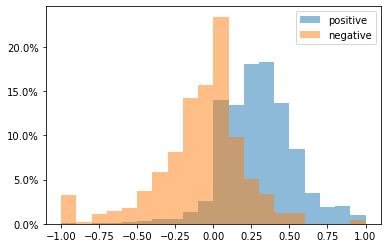

In [265]:
#Plot + and - hotel reviews in overlayed histograms
plt.hist(hotel_reviews_pos["Polarity"], weights=np.ones(len(hotel_reviews_pos["Polarity"])) / 
         len(hotel_reviews_pos["Polarity"]),
         bins=20, alpha=0.5)

plt.hist(hotel_reviews_neg["Polarity"], weights=np.ones(len(hotel_reviews_neg["Polarity"])) / 
         len(hotel_reviews_neg["Polarity"]),
         bins=20, alpha =0.5)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Add a legend
plt.legend(('positive', 'negative'), loc='upper right')



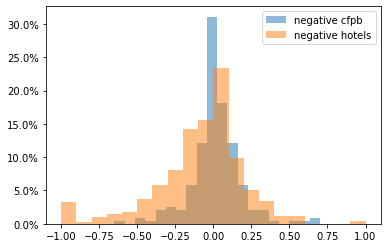

In [267]:
#Plot complaints and - hotel reviews in overlayed histograms
plt.hist(data_with_narrative["Polarity"], weights=np.ones(len(data_with_narrative["Polarity"])) / 
         len(data_with_narrative["Polarity"]),
         bins=20,alpha =0.5)
plt.hist(hotel_reviews_neg["Polarity"], weights=np.ones(len(hotel_reviews_neg["Polarity"])) / 
         len(hotel_reviews_neg["Polarity"]),
         bins=20, alpha =0.5)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))


plt.legend(('negative cfpb', 'negative hotels'), loc='upper right')

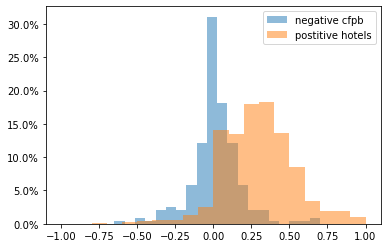

In [268]:
#Plot complains and + hotel reviews in overlayed histograms
plt.hist(data_with_narrative["Polarity"], weights=np.ones(len(data_with_narrative["Polarity"])) / 
         len(data_with_narrative["Polarity"]),
         bins=20,alpha =0.5)

plt.hist(hotel_reviews_pos["Polarity"], weights=np.ones(len(hotel_reviews_pos["Polarity"])) / 
         len(hotel_reviews_pos["Polarity"]),
         bins=20, alpha=0.5)

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.legend(('negative cfpb', 'postitive hotels'), loc='upper right')